In [1]:
!pip install firebase-admin

In [5]:
!pip install pyarrow
import pandas as pd
import numpy as np 
from numpy.random import choice, randint
import matplotlib.pyplot as plt

import firebase_admin
from firebase_admin import credentials, firestore

cred = credentials.Certificate('/workspaces/Projects/mlpythontofirebase/sidequest-fd22f-firebase-adminsdk-3g1od-ab05213923.json')
db = firestore.client()

print('initialized')

initialized


In [6]:
devs = db.collection('developers')

In [7]:
languages = {
    u'python':50,
    u'rust':25,
    u'typescript':10,
    u'jave':0,
    u'coffeescript':-10,
    u'elm':-2,
    u'cobol':-50,
    u'c++':20,
    u'c#':10,
}

for i in range(0, 200):
    dev = {
        'firebase': randint(0, 2),
        'language': choice(list(languages.keys())),
        'age': randint(10, 99)
    }

    r = randint(-25, 25)
    dev['Happiness'] = r + languages[dev['language']] + (25 if dev['firebase'] else -25)

    devs.add(dev)


In [8]:
docs = devs.get()
data = []
for doc in docs:
    data.append(doc.to_dict())
    df = pd.DataFrame(data)
    
df.to_csv('data.csv', index=False)


In [9]:
df = pd.read_csv('data.csv')
df.sample(10)

,language,age,Happiness,firebase
47,coffeescript,14,-28,0
74,jave,19,-24,0
123,typescript,51,52,1
198,c#,16,21,1
180,rust,38,-4,0
38,cobol,54,-77,0
97,python,54,93,1
93,coffeescript,12,-50,0
137,cobol,66,-16,1
40,c#,85,-9,0


<Axes: ylabel='Frequency'>

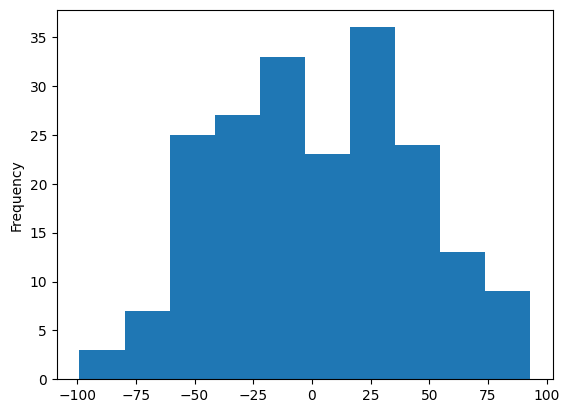

In [10]:
df['Happiness'].plot.hist()

In [11]:
df.describe()

,age,Happiness,firebase
count,200.000000,200.000000,200.000000
mean,51.480000,1.325000,0.450000
std,25.015967,41.802592,0.498742
min,10.000000,-99.000000,0.000000
25%,30.000000,-28.000000,0.000000
50%,52.000000,-1.000000,0.000000
75%,71.000000,31.000000,1.000000
max,97.000000,93.000000,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['language'] = le.fit_transform(df['language'])
le.classes_

array(['c#', 'c++', 'cobol', 'coffeescript', 'elm', 'jave', 'python',
       'rust', 'typescript'], dtype=object)

In [13]:
df.sample(5)

,language,age,Happiness,firebase
142,0,30,23,1
100,3,55,23,1
39,7,36,4,0
198,0,16,21,1
110,6,14,71,1


In [15]:
x = df.drop(labels='Happiness', axis=1)
y = df['Happiness']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=23)

X_train.head()

,language,age,firebase
67,3,11,1
127,7,25,0
45,6,75,0
59,3,31,0
181,5,10,0


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(max_depth=3, random_state=23, n_estimators=500)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("Model Mean Absolute Error MAE {}".format(mean_absolute_error(y_test, preds)))


Model Mean Absolute Error MAE 13.652218124354752


In [17]:
randos = randint(-100, high=100, size=len(y_test))
print("Random Predictions MAE {}".format(mean_absolute_error(y_test, randos)))

Random Predictions MAE 55.57575757575758


In [18]:
pd.DataFrame(data=[model.feature_importances_], columns=x.columns)

,language,age,firebase
0,0.374049,0.013664,0.612287


In [20]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

In [21]:
from firebase_admin import storage
bucket = storage.bucket(name='gs://sidequest-fd22f.appspot.com')

In [22]:
bucket = storage.bucket(name='sidequest-fd22f.appspot.com')

In [23]:
b = bucket.blob('gs://sidequest-fd22f.appspot.com/model.joblib')
b.upload_from_filename('model.joblib')
print('model_uploaded')

model_uploaded


In [24]:
import sys
print(sys.version)

3.10.13 (main, Feb  6 2024, 19:53:26) [GCC 9.4.0]
